<a href="https://colab.research.google.com/github/FNSY96/Cartoonify-Images/blob/master/Cartoonify_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import pandas as pd
from pylab import *
import glob
import os
import cv2
import numpy as np
import urllib
import urllib.request as req
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='img.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('img.zip')
f.Upload()

In [76]:
!unzip /content/img

Archive:  /content/img.zip
replace Untitled.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
# import cv2
# print("imported openCV")

#Code

## Hide the grid lines in all plots

In [0]:
plt.rcParams["axes.grid"] = False

## Loading Images

In [0]:
test_root = '/content/'
for image_name in glob.glob(f'{test_root}/*.jpg'):
  image = mpimg.imread(image_name)

In [80]:
image.shape

(481, 321, 3)

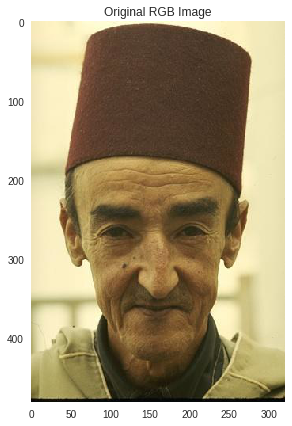

In [81]:
  plt.figure(figsize=(7,7))
  title('Original RGB Image')
  plt.imshow(image)
  plt.show(True)

## Applying Median Blur

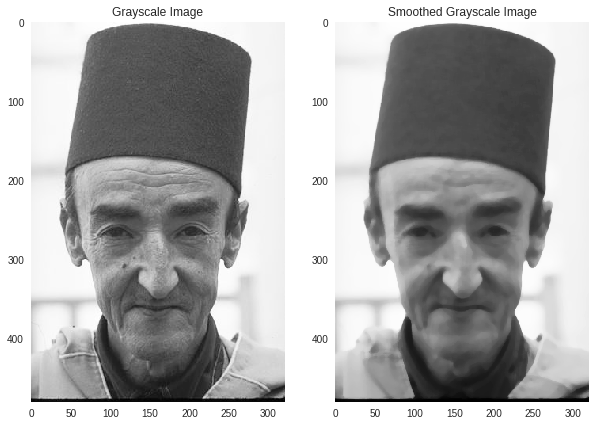

In [82]:
gray = cv2.cvtColor(255-image, cv2.COLOR_RGB2GRAY)
# applying median blur with 7 x 7 square apreture
median = cv2.medianBlur(gray,7)
plt.figure(figsize=(10,10))
subplot(1,2,1)
title('Grayscale Image')
plt.imshow(gray)
subplot(1,2,2)
title('Smoothed Grayscale Image')
plt.imshow(median)
show()

## Applying Laplacian

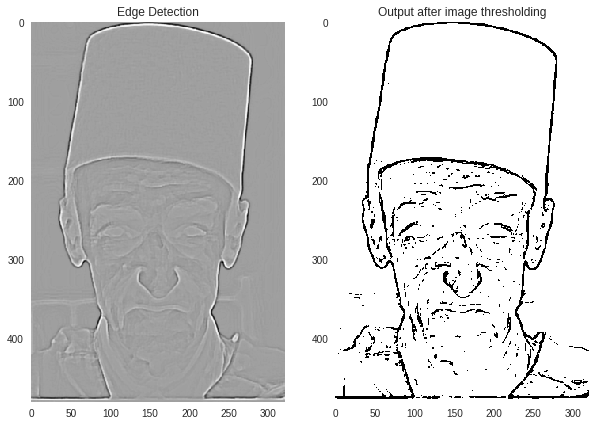

In [83]:
# applying laplacian filter with kernel size = 5
laplacian = cv2.Laplacian(median,ddepth = cv2.CV_64F,ksize = 5,scale = 1,delta = 1)
#binary threshold black < 125 and white >= 125
ret,after_threshold = cv2.threshold(laplacian,125,255,cv2.THRESH_BINARY)
# after_threshold = cv2.adaptiveThreshold(laplacian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 125, 1)
plt.figure(figsize=(10,10))
subplot(1,2,1)
title('Edge Detection')
plt.imshow(laplacian)
subplot(1,2,2)
title('Output after image thresholding')
plt.imshow(after_threshold)
show()

## Applying Bilateral

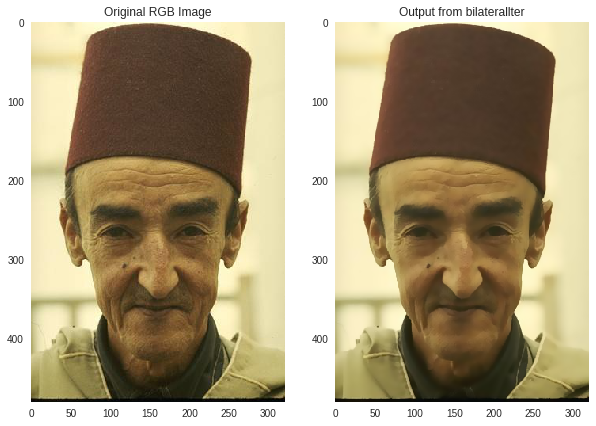

In [84]:
# small = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
# bilateral_filtering_input = small
bilateral_filtering_input = image
bilateral = cv2.bilateralFilter(bilateral_filtering_input,9, 35, 35)
plt.figure(figsize=(10,10))
subplot(1,2,1)
title('Original RGB Image')
plt.imshow(image)
subplot(1,2,2)
title('Output from bilaterallter')
plt.imshow(bilateral)
show()

## Cartoon Image!

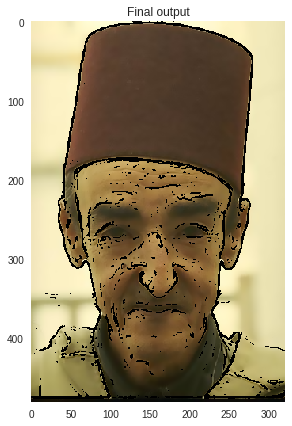

In [85]:
# since the after_threshold output has 3 channels RGB
# we must make also the outline (in gray scale) 
# to have 3 channels also
# http://www.emgu.com/wiki/files/3.0.0/document/html/e3f8abb7-3706-0ccd-46f0-8c57c2232585.htm
# useful link to solve the problem

three_channel_thresholded = 255-cv2.cvtColor(after_threshold.astype('uint16'), cv2.COLOR_GRAY2BGR)
cartoon = cv2.bitwise_and(bilateral.astype('uint16'), three_channel_thresholded.astype('uint16'))
plt.figure(figsize=(7,7))
title('Final output')
plt.imshow(cartoon)
plt.show(True)

# Summerizing Results

## Generating Black and White Sketch

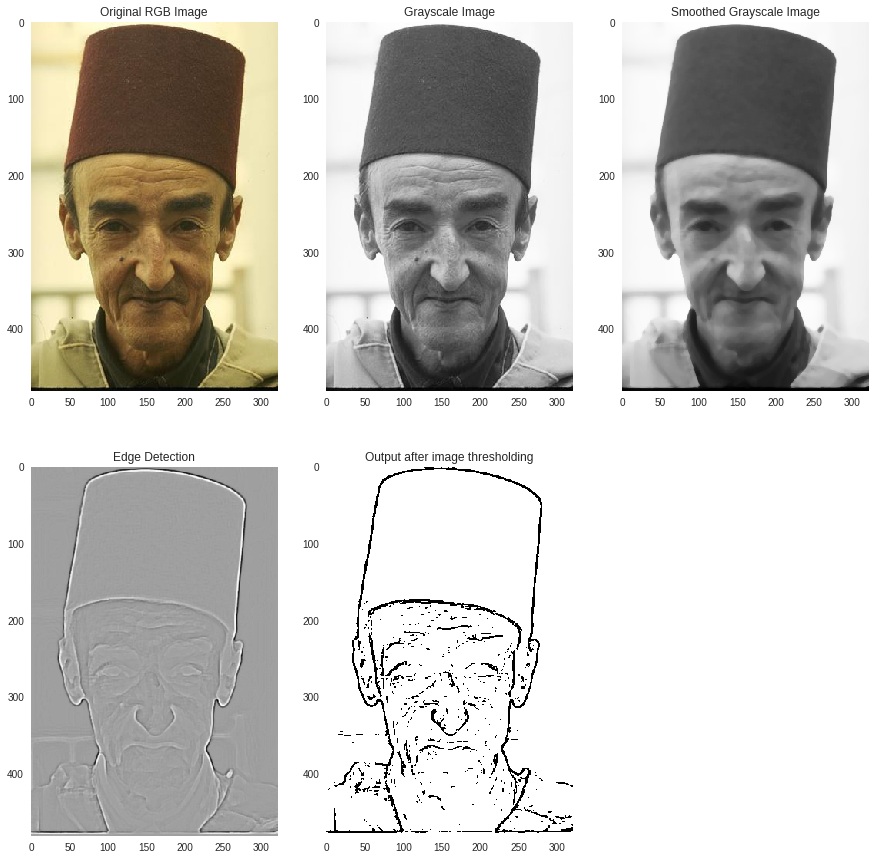

In [86]:
plt.figure(figsize=(15,15))
subplot(2,3,1)
title('Original RGB Image')
plt.imshow(image)
 
subplot(2,3,2)
title('Grayscale Image')
plt.imshow(gray)
 
subplot(2,3,3)
title('Smoothed Grayscale Image')
plt.imshow(median)
 
subplot(2,3,4)
title('Edge Detection')
plt.imshow(laplacian)

subplot(2,3,5)
title('Output after image thresholding')
plt.imshow(after_threshold)
 
show()


## Generating a color painting and a cartoon

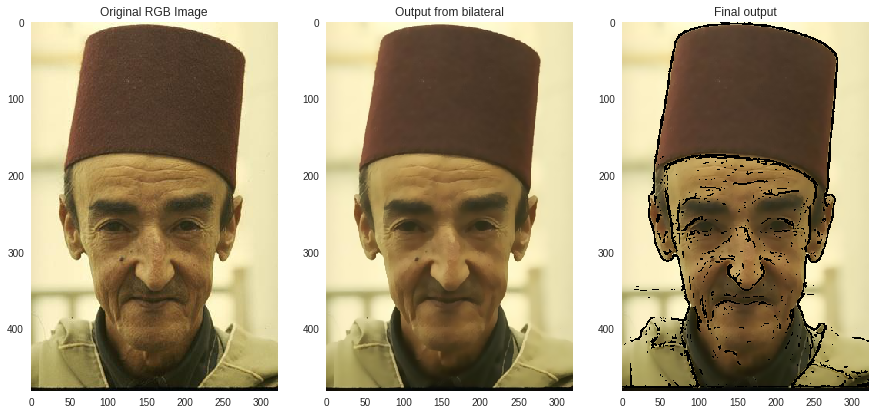

In [87]:
plt.figure(figsize=(15,15))
subplot(1,3,1)
title('Original RGB Image')
plt.imshow(image)
 
subplot(1,3,2)
title('Output from bilateral')
plt.imshow(bilateral)
 
subplot(1,3,3)
title('Final output')
plt.imshow(cartoon)